¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola! Recuerda que para los ejercicio de análisis de datos es necesario desarrollar la introducción, objetivo y etapas de análisis. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
games_df = pd.read_csv("/datasets/games.csv" )
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Paso 2. Prepara los datos

In [4]:
# Renombrar las columnas a minúsculas
games_df.columns = games_df.columns.str.lower()

# Mostrar las primeras filas para verificar el cambio
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')  
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors="coerce")
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [6]:
games_df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7939,SD Gundam GX,SNES,1994,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
103,Just Dance,Wii,2009,Misc,3.48,2.99,0.00,0.73,49.0,8.0,E10+
1020,Xenosaga Episode I: Der Wille zur Macht,PS2,2002,Role-Playing,0.63,0.49,0.45,0.17,83.0,8.7,T
15346,Higurashi Daybreak Portable Mega Edition,PSP,2009,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15132,Lunatic Dawn Tempest,PS2,2001,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4415,Fable,X360,2014,Role-Playing,0.25,0.15,0.01,0.04,NaN,NaN,NaN
9323,Little League World Series Baseball 2009,DS,2009,Sports,0.12,0.00,0.00,0.01,NaN,NaN,E
15245,Totally Spies! 2: Undercover,DS,2006,Action,0.01,0.01,0.00,0.00,NaN,NaN,NaN
12783,Girls RPG: Cinderellife,3DS,2012,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,NaN
14057,Napoleon Dynamite: The Game,PSP,2007,Puzzle,0.03,0.00,0.00,0.00,37.0,4.6,E10+


1.- Cambie la columna year_of_release de float a int. Los años lanzamientos deben ser enteros, no existen fechas flotantes

2.- Cambie la columna user_score de object a float. la puntuación debe ser un valor númerico para poder hacer cálculos

In [45]:
critic_score_median = games_df["critic_score"].median()
user_score_median = games_df["user_score"].median()
print(games_df["critic_score"].mean())
print(games_df["critic_score"].median())
print(games_df["user_score"].mean())
print(games_df["user_score"].median())

68.96767850559173
68.96767850559173
7.125046113306982
7.125046113306982


In [46]:
games_df["critic_score"] = games_df["critic_score"].fillna(critic_score_median)
games_df["user_score"] = games_df["user_score"].fillna(user_score_median)


<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Recuerda que cuando trabajamos con distribuciones sesgadas se recomienda completar los valores nulos con la mediana en lugar de la media

</div>

In [47]:
print(games_df["critic_score"].median())
print(games_df["user_score"].median())
games_df.head(10)

68.96767850559173
7.125046113306982


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.967679,7.125046,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68.967679,7.125046,NaN,28.31


Comprobe los valores atipicos de critic_score y user_score y determine que no habian, por lo tanto rellene los valores ausentes usando la media.

Para los valores de rating decidí dejarlos ausentes ya que la clasificación no es algo que yo deba decidir por mi cuenta

In [10]:
# Calcular las ventas totales (la suma de las ventas en todas las regiones) para cada juego
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Mostrar las primeras filas para verificar el cambio
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,NaN,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

## Paso 3. Analiza los datos

In [11]:
games_per_year = games_df['year_of_release'].value_counts().sort_index()
print(games_per_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


 ¿Son significativos los datos de cada período? Si, podemos ver que hay un aumento significativo con el paso de los años y como despues empieza a ver un declive

In [12]:
# Calcular las ventas totales para cada plataforma
platform_sales = games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales['total_sales'] = platform_sales.sum(axis=1)

In [13]:
print(platform_sales)

          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
2600         90.60      5.47      0.00         0.91        96.98
3DO           0.00      0.00      0.10         0.00         0.10
3DS          83.49     61.48    100.67        13.36       259.00
DC            5.43      1.69      8.56         0.27        15.95
DS          382.40    188.89    175.57        59.26       806.12
GB          114.32     47.82     85.12         8.20       255.46
GBA         187.54     75.25     47.33         7.73       317.85
GC          133.46     38.71     21.58         5.18       198.93
GEN          21.05      6.05      2.70         0.97        30.77
GG            0.00      0.00      0.04         0.00         0.04
N64         139.02     41.06     34.22         4.38       218.68
NES         125.94     21.15     98.65         5.31       251.05
NG            0.00      0.00      1.44         0.00         1.44
PC           94.53    142

In [14]:
# Elegir las plataformas con las mayores ventas totales
top_platforms = platform_sales.sort_values('total_sales', ascending=False).head(10)
print(top_platforms)

          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS2         583.84    339.29    139.20       193.44      1255.77
X360        602.47    270.76     12.43        85.76       971.42
PS3         393.49    330.29     80.19       135.68       939.65
Wii         496.90    262.21     69.33        79.07       907.51
DS          382.40    188.89    175.57        59.26       806.12
PS          336.52    213.61    139.82        40.91       730.86
GBA         187.54     75.25     47.33         7.73       317.85
PS4         108.74    141.09     15.96        48.35       314.14
PSP         109.17     66.68     76.78        41.42       294.05
PC           94.53    142.44      0.17        22.38       259.52


In [15]:
top_platform_names = top_platforms.index.tolist()
top_platforms_data = games_df[games_df['platform'].isin(top_platform_names)]
print(top_platform_names)
print(top_platforms_data)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
                                                   name platform  \
0                                            Wii Sports      Wii   
2                                        Mario Kart Wii      Wii   
3                                     Wii Sports Resort      Wii   
6                                 New Super Mario Bros.       DS   
7                                              Wii Play      Wii   
...                                                 ...      ...   
16708                Woody Woodpecker in Crazy Castle 5      GBA   
16709  SCORE International Baja 1000: The Official Game      PS2   
16710                     Samurai Warriors: Sanada Maru      PS3   
16711                                  LMA Manager 2007     X360   
16713                                  Spirits & Spells      GBA   

       year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
0                 2006    Sports   

In [16]:
# Agrupar las ventas por año y plataforma
sales_by_year_platform = top_platforms_data.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
sales_by_year_platform['total_sales'] = sales_by_year_platform[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


<Figure size 1400x800 with 0 Axes>

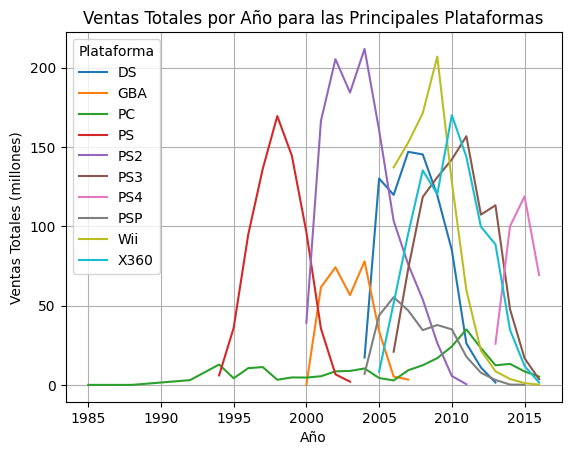

In [17]:
# Pivote para una mejor visualización
sales_by_year_platform_pivot = sales_by_year_platform['total_sales'].unstack(level=1)

# Plotear las ventas por año para las plataformas principales
plt.figure(figsize=(14, 8))
sales_by_year_platform_pivot.plot(kind='line')
plt.title('Ventas Totales por Año para las Principales Plataformas')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

Las consolas suelen tener una duración de 10 años

In [18]:

# Identificar las plataformas que solían ser populares pero que ahora no tienen ventas
current_year = games_df['year_of_release'].max()
popular_past_platforms = sales_by_year_platform_pivot.columns[sales_by_year_platform_pivot.loc[current_year].isna() & sales_by_year_platform_pivot.notna().any()]

# Determinar la duración de la aparición y desaparición de plataformas
platform_lifetimes = games_df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetimes['duration'] = platform_lifetimes['max'] - platform_lifetimes['min']

# Mostrar las plataformas populares en el pasado pero que ya no tienen ventas
popular_past_platforms_list = popular_past_platforms.tolist()
platform_lifetimes.loc[popular_past_platforms_list]

,min,max,duration
platform,,,
DS,1985,2013,28
GBA,2000,2007,7
PS,1994,2003,9
PS2,2000,2011,11
PSP,2004,2015,11


In [48]:
# Calcular las ventas totales por plataforma a partir de 2012
filtered_games_df = games_df[games_df['year_of_release'] >= 2012]
platform_sales_since_2012 = filtered_games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales_since_2012['total_sales'] = platform_sales_since_2012.sum(axis=1)


# Ordenar las plataformas por ventas totales en orden descendente
platform_sales_sorted = platform_sales_since_2012.sort_values('total_sales', ascending=False)

# Seleccionar las principales plataformas en términos de ventas totales
top_platforms_names = platform_sales_sorted.head(10).index.tolist()
print(top_platforms_names)

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']


In [49]:

# Filtrar los datos para las plataformas principales
top_platforms_data = filtered_games_df[filtered_games_df['platform'].isin(top_platforms_names)]

# Agrupar las ventas por año y plataforma
sales_by_year_platform = top_platforms_data.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
sales_by_year_platform['total_sales'] = sales_by_year_platform[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
print(sales_by_year_platform["total_sales"])

year_of_release  platform
2012             3DS          51.36
                 DS           11.01
                 PC           23.22
                 PS3         107.36
                 PSV          16.19
                 Wii          21.71
                 WiiU         17.56
                 X360         99.74
2013             3DS          56.57
                 DS            1.54
                 PC           12.38
                 PS3         113.25
                 PS4          25.99
                 PSV          10.59
                 Wii           8.59
                 WiiU         21.65
                 X360         88.58
                 XOne         18.96
2014             3DS          43.76
                 PC           13.28
                 PS3          47.76
                 PS4         100.00
                 PSV          11.90
                 Wii           3.75
                 WiiU         22.03
                 X360         34.74
                 XOne         54.07
20

<Figure size 1400x800 with 0 Axes>

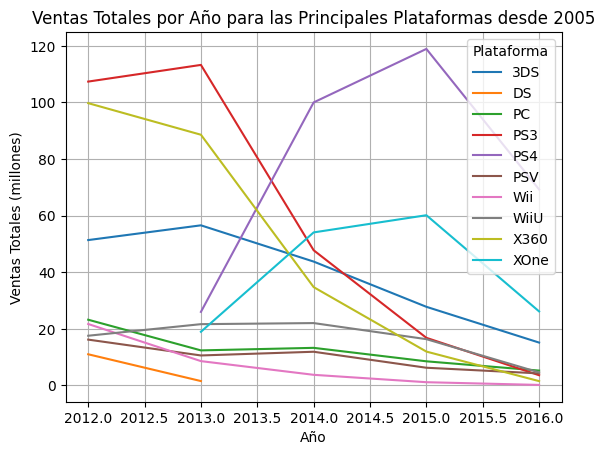

In [50]:
# Pivote para una mejor visualización
sales_by_year_platform_pivot = sales_by_year_platform['total_sales'].unstack(level=1)

# Graficar las ventas por año para las plataformas principales
plt.figure(figsize=(14, 8))
sales_by_year_platform_pivot.plot(kind='line')
plt.title('Ventas Totales por Año para las Principales Plataformas desde 2005')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()


In [51]:
# Mostrar las plataformas principales con sus ventas totales
platform_sales_sorted.head(10)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS4,108.74,141.09,15.96,48.35,314.14
PS3,103.38,106.86,35.29,43.26,288.79
X360,140.05,74.52,1.57,20.40,236.54
3DS,55.31,42.64,87.79,8.87,194.61
XOne,93.12,51.59,0.34,14.27,159.32
WiiU,38.10,25.13,13.01,5.95,82.19
PC,19.12,37.76,0.00,5.77,62.65
PSV,10.98,11.36,21.04,5.80,49.18
Wii,17.45,11.92,3.39,2.61,35.37


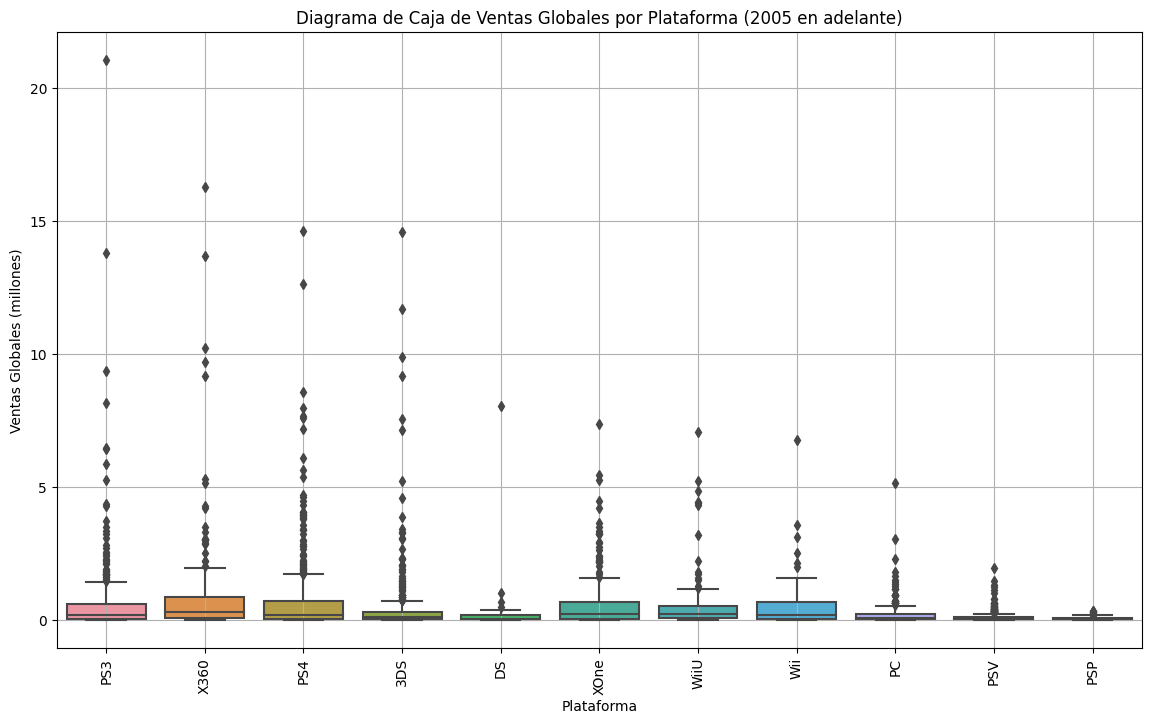

platform
X360    0.810068
PS4     0.801378
Wii     0.655000
XOne    0.645020
PS3     0.585781
WiiU    0.559116
3DS     0.491439
DS      0.404839
PC      0.250600
PSV     0.119659
PSP     0.064682
Name: total_sales, dtype: float64

In [52]:
# Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=filtered_games_df)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2005 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Calcular las ventas promedio por plataforma
average_sales_by_platform = filtered_games_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
average_sales_by_platform

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Las diferencias en las ventas entre las plataformas son significativas, especialmente entre las consolas de última generación y las más antiguas. 

Las plataformas PS4, X360, y PS3 son las líderes en términos de ventas promedio por juego.

In [53]:
# Filtrar los datos para la plataforma Wii
wii_data = filtered_games_df[filtered_games_df['platform'] == 'Wii']


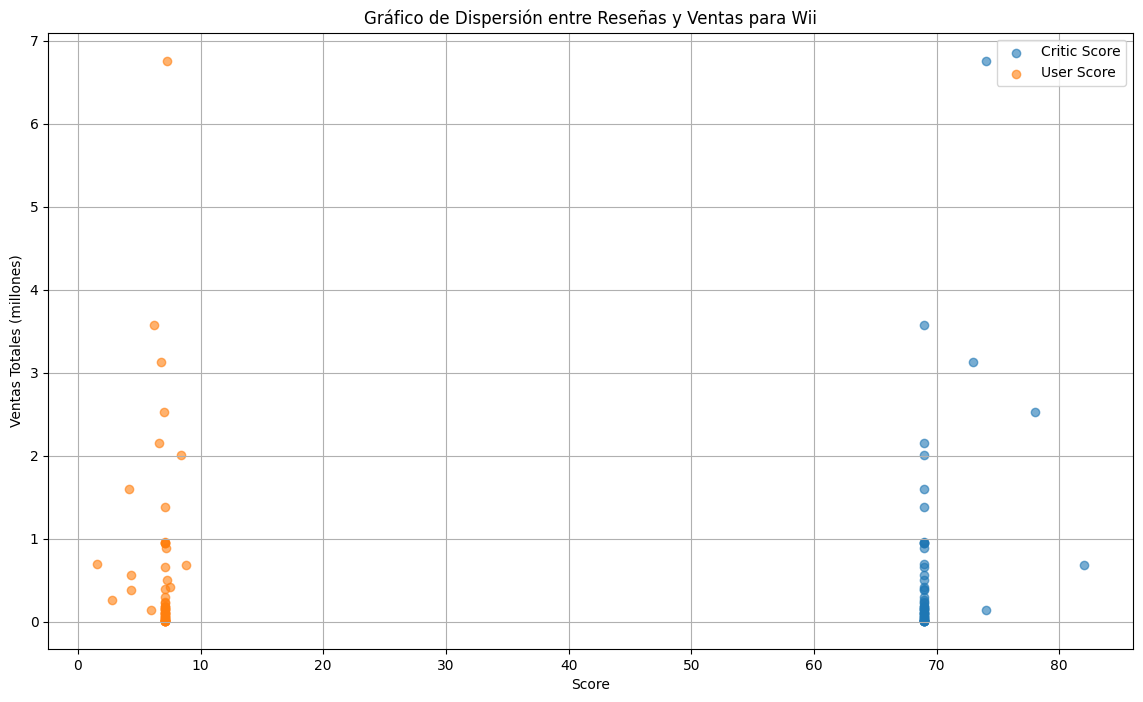

In [54]:
# Crear un gráfico de dispersión entre las reseñas y las ventas
plt.figure(figsize=(14, 8))
plt.scatter(wii_data['critic_score'], wii_data['total_sales'], label='Critic Score', alpha=0.6)
plt.scatter(wii_data['user_score'], wii_data['total_sales'], label='User Score', alpha=0.6)
plt.title('Gráfico de Dispersión entre Reseñas y Ventas para Wii')
plt.xlabel('Score')
plt.ylabel('Ventas Totales (millones)')
plt.legend()
plt.grid(True)
plt.show()



<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

In [55]:
# Calcular la correlación entre las reseñas y las ventas
correlation_critic = wii_data[['critic_score', 'total_sales']].corr().iloc[0, 1]
correlation_user = wii_data[['user_score', 'total_sales']].corr().iloc[0, 1]

correlation_critic, correlation_user


(0.3799196266433455, -0.019465400388616393)

In [56]:
#Comparar con otra plataforma (PS4)

ps4_data = filtered_games_df[filtered_games_df['platform'] == 'PS4']


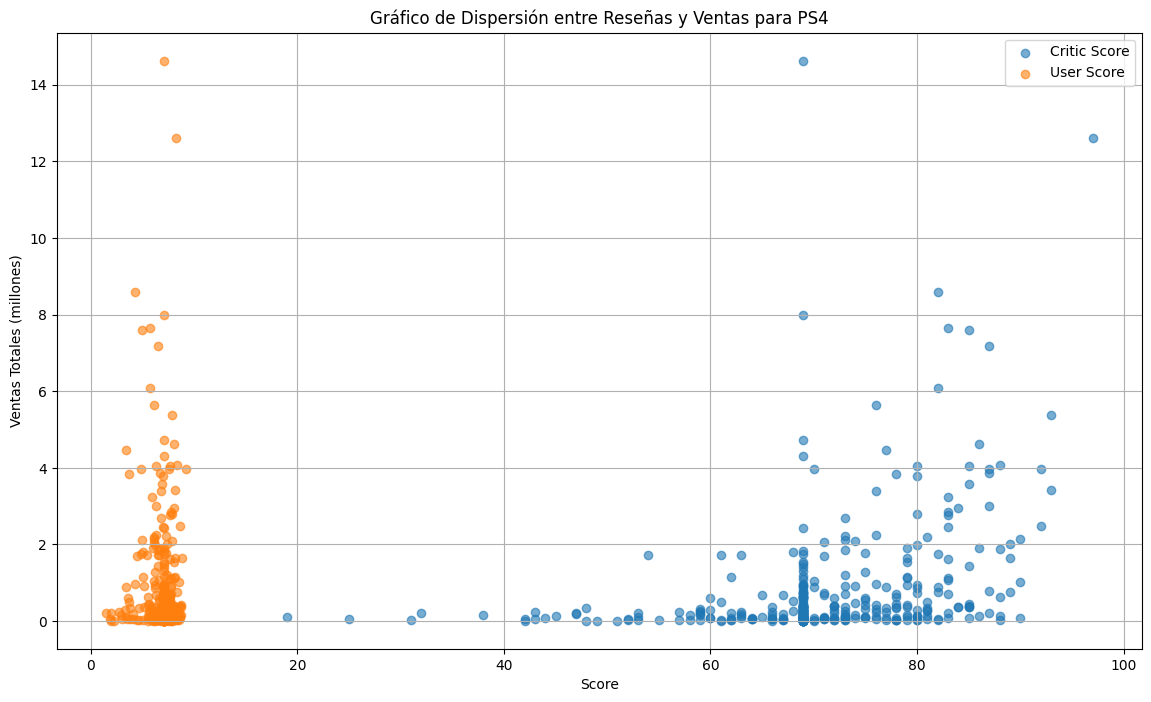

In [57]:
# Crear un gráfico de dispersión entre las reseñas y las ventas
plt.figure(figsize=(14, 8))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], label='Critic Score', alpha=0.6)
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], label='User Score', alpha=0.6)
plt.title('Gráfico de Dispersión entre Reseñas y Ventas para PS4')
plt.xlabel('Score')
plt.ylabel('Ventas Totales (millones)')
plt.legend()
plt.grid(True)
plt.show()



In [58]:
# Calcular la correlación entre las reseñas y las ventas
correlation_critic = ps4_data[['critic_score', 'total_sales']].corr().iloc[0, 1]
correlation_user = ps4_data[['user_score', 'total_sales']].corr().iloc[0, 1]

correlation_critic, correlation_user

(0.34900958029245843, -0.04539086100332348)

In [59]:
genre_distribution = games_df['genre'].value_counts()

genre_distribution

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

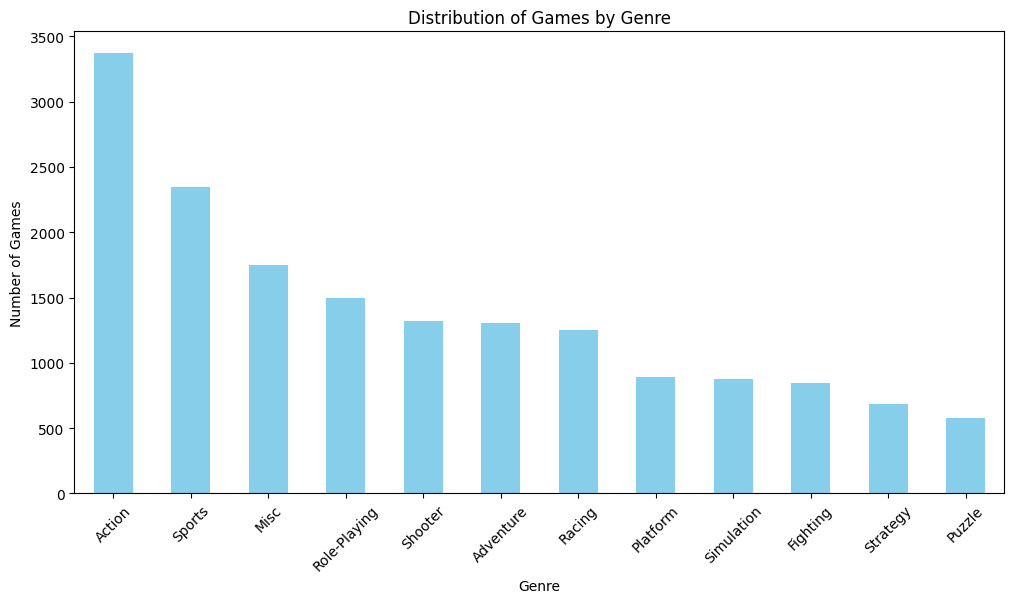

In [60]:
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()




In [61]:
# Calcular total de ventas por genero
#games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
genre_sales = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)



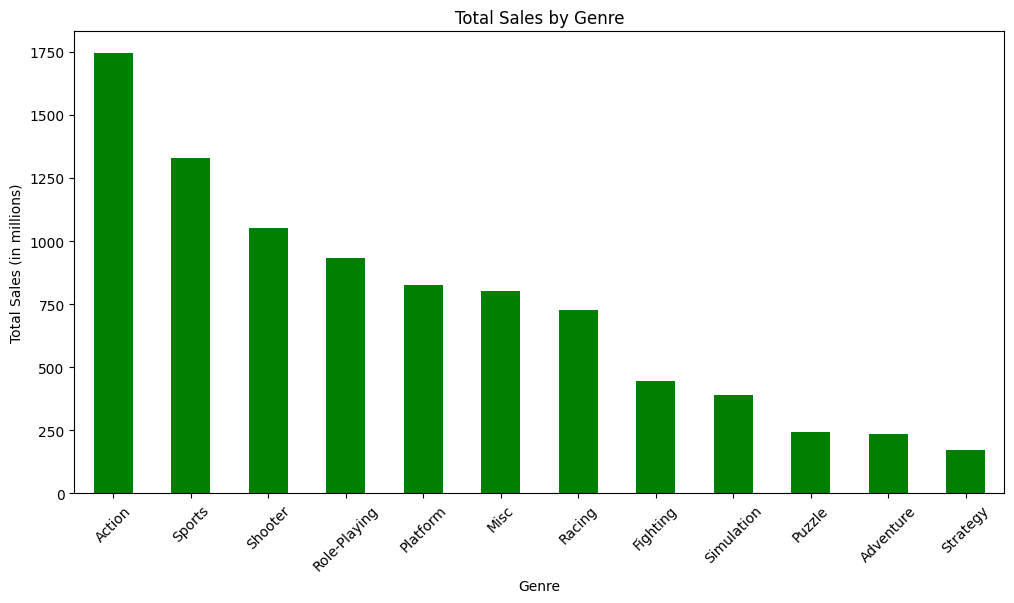

In [62]:
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()



In [63]:

high_sales_genres = genre_sales.head(5)
low_sales_genres = genre_sales.tail(5)

high_sales_genres, low_sales_genres

(genre
 Action          1744.17
 Sports          1331.27
 Shooter         1052.45
 Role-Playing     934.56
 Platform         827.77
 Name: total_sales, dtype: float64,
 genre
 Fighting      447.53
 Simulation    389.97
 Puzzle        242.57
 Adventure     237.59
 Strategy      174.23
 Name: total_sales, dtype: float64)

Los juegos con más ventas estan más orientados a la acción

# Paso 4. Crea un perfil de usuario para cada región

In [64]:
#Plataformas por región
platform_sales_na = games_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
platform_sales_eu = games_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
platform_sales_jp = games_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)



In [65]:
# Calcular el top 5
top_5_platforms_na = platform_sales_na.head(5)
top_5_platforms_eu = platform_sales_eu.head(5)
top_5_platforms_jp = platform_sales_jp.head(5)



In [66]:
#Crear un nuevo DF de las plataformas
top_platforms_df = pd.DataFrame({
    'na_sales': top_5_platforms_na,
    'eu_sales': top_5_platforms_eu,
    'jp_sales': top_5_platforms_jp
}).fillna(0)

#Obtener los porcentajes
top_platforms_df['na_market_share'] = top_platforms_df['na_sales'] / top_platforms_df['na_sales'].sum() * 100
top_platforms_df['eu_market_share'] = top_platforms_df['eu_sales'] / top_platforms_df['eu_sales'].sum() * 100
top_platforms_df['jp_market_share'] = top_platforms_df['jp_sales'] / top_platforms_df['jp_sales'].sum() * 100

top_platforms_df = top_platforms_df[['na_market_share', 'eu_market_share', 'jp_market_share']]

print(top_platforms_df)

          na_market_share  eu_market_share  jp_market_share
platform                                                   
3DS              0.000000         0.000000        14.984892
DS              15.550405         0.000000        26.133877
PS               0.000000        15.083748        20.812432
PS2             23.742019        23.958451        20.720144
PS3             16.001383        23.322930         0.000000
SNES             0.000000         0.000000        17.348655
Wii             20.206580        18.515563         0.000000
X360            24.499614        19.119309         0.000000


Norte america y Europa tienen tops de plataformas similares, Japónm muestra diferente comportamiento inclinandose por consolas más viejas

In [38]:
genres_sales_na = games_df.groupby("genre")["na_sales"].sum().sort_values(ascending=False)
genres_sales_eu = games_df.groupby("genre")["eu_sales"].sum().sort_values(ascending=False)
genres_sales_jp = games_df.groupby("genre")["jp_sales"].sum().sort_values(ascending=False)

In [39]:
top_5_genres_na = genres_sales_na.head(5)
top_5_genres_eu = genres_sales_eu.head(5)
top_5_genres_jp = genres_sales_jp.head(5)

In [40]:
#Crear un nuevo DF de las plataformas
top_genres_df = pd.DataFrame({
    'na_sales': top_5_genres_na,
    'eu_sales': top_5_genres_eu,
    'jp_sales': top_5_genres_jp
}).fillna(0)

#Obtener los porcentajes
top_genres_df['na_market_genres'] = top_genres_df['na_sales'] / top_genres_df['na_sales'].sum() * 100
top_genres_df['eu_market_genres'] = top_genres_df['eu_sales'] / top_genres_df['eu_sales'].sum() * 100
top_genres_df['jp_market_genres'] = top_genres_df['jp_sales'] / top_genres_df['jp_sales'].sum() * 100

top_genres_df = top_genres_df[['na_market_genres', 'eu_market_genres', 'jp_market_genres']]

print(top_genres_df)

              na_market_genres  eu_market_genres  jp_market_genres
genre                                                             
Action               29.218036         31.225677         18.111340
Misc                 13.537536         12.796314         12.129202
Platform             14.808290          0.000000         14.678230
Racing                0.000000         14.226080          0.000000
Role-Playing          0.000000          0.000000         39.874568
Shooter              19.685885         19.088005          0.000000
Sports               22.750253         22.663924         15.206660


Mientars Europa y Norte America prefieren generos de acción Japón predomina el genero de Role-Playing

In [41]:
esrb_sales_na = games_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = games_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = games_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)


esrb_sales_df = pd.DataFrame({
    'na_sales': esrb_sales_na,
    'eu_sales': esrb_sales_eu,
    'jp_sales': esrb_sales_jp
}).fillna(0)

esrb_sales_df['na_market_share'] = esrb_sales_df['na_sales'] / esrb_sales_df['na_sales'].sum() * 100
esrb_sales_df['eu_market_share'] = esrb_sales_df['eu_sales'] / esrb_sales_df['eu_sales'].sum() * 100
esrb_sales_df['jp_market_share'] = esrb_sales_df['jp_sales'] / esrb_sales_df['jp_sales'].sum() * 100

esrb_sales_df = esrb_sales_df[['na_market_share', 'eu_market_share', 'jp_market_share']]
print(esrb_sales_df)

        na_market_share  eu_market_share  jp_market_share
rating                                                   
AO             0.039875         0.033686         0.000000
E             40.918829        39.222129        43.501460
E10+          11.181402        10.410638         8.827211
EC             0.048419         0.006075         0.000000
K-A            0.081015         0.014910         0.320590
M             23.686900        26.726271        14.105970
RP             0.000000         0.004418         0.000000
T             24.043558        23.581874        33.244768


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

Parece no afectar mucho

# Paso 5. Prueba las siguientes hipótesis:

In [42]:
xbox_one_scores = games_df[games_df['platform'] == 'XOne']['user_score'].dropna().astype(float)
pc_scores = games_df[games_df['platform'] == 'PC']['user_score'].dropna().astype(float)

alpha=0.05
results = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

print('valor p:', results.pvalue)# tu código: imprime el valor p obtenido)

if results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.0718459399074417e-05
Rechazamos la hipótesis nula


In [43]:
action_genre_scores = games_df[games_df['genre'] == 'Action']['user_score'].dropna()
sports_genre_scores = games_df[games_df['genre'] == 'Sports']['user_score'].dropna()

alpha=0.05
results = st.ttest_ind(action_genre_scores, sports_genre_scores, equal_var=False)

print('valor p:', results.pvalue)# tu código: imprime el valor p obtenido)

if results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.18782272416195633
No podemos rechazar la hipótesis nula


 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

1. Para las calificaciones promedio de los usuarios para las plataformas Xbox One y PC:
Hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales. 

Hipótesis alternativa: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes. 

2. Para las calificaciones promedio de los usuarios para los géneros de Acción y Deportes:
Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

El criterio utilizado para tomar este método fue debido a su capacidad para comparar las medias de dos grupos independientes en este caso, las calificaciones promedio de los usuarios para diferentes plataformas y géneros.


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con valores que no sesgan nuestros resultados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>